# **U.S. Medical Insurance Costs Analysis**
### For this analysis we will be using the file named **insurance.csv** which contains data about different patients info and costs.
### Some questions that will be answered by performing a descriptive analysis:
    1. What is the average cost for smokers and non-smokers?
    2. What is the mean and median age of the patients?
    3. What is the cost for people with children and without children?
    4. Do women and men have the same costs?

In [27]:
import csv
import matplotlib.pyplot as plt

# Adding our data in lists so that it will be easy to analyze. Each list represents a column.
ages = []
sexes = []
bmis = []
children = []
smokers = []
regions = []
charges = []

with open('insurance.csv') as insurance_file:
  insurances = csv.DictReader(insurance_file, delimiter = ',')
  for row in insurances:
    ages.append(row['age'])
    sexes.append(row['sex'])
    bmis.append(row['bmi'])
    children.append(row['children'])
    smokers.append(row['smoker'])
    regions.append(row['region'])
    charges.append(row['charges'])

## 1. Calculation for the average cost for smokers and non-smokers in US dollars.

The average cost for smokers: 32050
The average cost for non-smokers: 8434


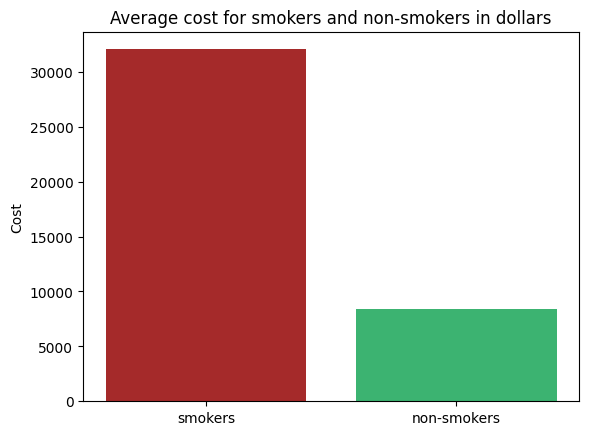

In [28]:
def avg_smoker_charges(smokers, charges):
  smoker_count = 0
  smoker_ammount = 0
  nosmoker_ammount = 0
  for i in range(len(smokers)):
    if smokers[i] == 'yes':
      smoker_ammount += float(charges[i])
      smoker_count += 1
    else:
      nosmoker_ammount += float(charges[i])
  avg_smoker = smoker_ammount / smoker_count
  avg_nosmoker = nosmoker_ammount / (len(smokers) - smoker_count)
  print('The average cost for smokers: ' + str(round(avg_smoker)))
  print('The average cost for non-smokers: ' + str(round(avg_nosmoker)))

  x = ['smokers', 'non-smokers']
  y = round(avg_smoker),round(avg_nosmoker)
  plt.bar(x, y, color = ['brown','mediumseagreen'])
  plt.ylabel('Cost')
  plt.title('Average cost for smokers and non-smokers in dollars')
  plt.show()
avg_smoker_charges(smokers, charges)


### Looking at the average costs for smokers and non-smokers we can see that the `cost for smokers` is almost `4 times higher`.

## 2. Calculation for the mean and median age of patients.

In [29]:
age_ammount = 0
for age in ages:
  age_ammount += int(age)  
  mean_age = age_ammount / len(ages)
print('Mean age: ' + str(round(mean_age)))

sorted_ages = sorted(ages)

mid = len(sorted_ages) // 2

if len(sorted_ages) % 2 == 0:
 median_age = (int(sorted_ages[mid]) + int(sorted_ages[mid-1])) / 2
else:
  median_age = int(sorted_ages[mid])
  
print('Median age: ' + str(round(median_age)))

# Age range
len(sorted_ages)
age_range = int(sorted_ages[1337]) - int(sorted_ages[0])
print('Age range: ' + str(age_range))

Mean age: 39
Median age: 39
Age range: 46


### Both mean and median age of the patients is 39 years old. We have a `symmetrical distribution`.
### The age range is 46 years.

## 3. Calculations for the costs between patients with children and no children in US dollars.

In [30]:
def avg_cost_child(children, charges):
  childless_count = 0
  childless_amount = 0
  with_child_ammount = 0
  for i in range(len(children)):
    if children[i] == '0':
      childless_count += 1
      childless_amount += float(charges[i])
    else:
      with_child_ammount += float(charges[i])
  avg_with_child = with_child_ammount / (len(children) - childless_count)
  avg_nochild = childless_amount / childless_count
  print('Average cost with children : ' + str(round(avg_with_child)))
  print('Average cost with no children : ' + str(round(avg_nochild)))

avg_cost_child(children, charges)

Average cost with children : 13950
Average cost with no children : 12366


### Looks like having children costs more. That is expected.

## 4. Calculations for the costs between men and women in US dollars.

In [31]:
def cost_sexes(sexes, charges):
  male_ammount = 0
  male_count = 0
  female_ammount = 0
  for i in range(len(sexes)):
    if sexes[i] == 'male':
      male_ammount += float(charges[i])
      male_count += 1
    else:
      female_ammount += float(charges[i])
  avg_male_cost = male_ammount / male_count
  avg_female_cost = female_ammount / (len(sexes) - male_count)
  print('Percentage of male patients : ' + str(round(male_count / len(sexes)*100, 1)) + '%')
  print('Average cost for men : ' + str(round(avg_male_cost)))
  print('Average cost for women : ' + str(round(avg_female_cost)))   
cost_sexes(sexes, charges)

Percentage of male patients : 50.5%
Average cost for men : 13957
Average cost for women : 12570


### The average cost is higher for men than women. Each gender is equally represented in our data.

# *Conclusions*

### Looking at the results, it is sure to say that the majority of the insurance costs is from people who smoke. In addition, women have higher costs than men and that is something to analyze in a future causal analysis. Also, having children costs more as is expected.